<h2 id="data">MACHINE LEARNING PROJECT</h2>
Verzeo Machine Learning Main Project Batch: ML063B2


In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing 
%matplotlib inline
plt.rcParams['figure.figsize'] = 10,10


In [2]:
df =pd.read_csv('Information.csv',engine ='python')

In [3]:
df.head(3)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,‰ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
_unit_id                 20050 non-null int64
_golden                  20050 non-null bool
_unit_state              20050 non-null object
_trusted_judgments       20050 non-null int64
_last_judgment_at        20000 non-null object
gender                   19953 non-null object
gender:confidence        20024 non-null float64
profile_yn               20050 non-null object
profile_yn:confidence    20050 non-null float64
created                  20050 non-null object
description              16306 non-null object
fav_number               20050 non-null int64
gender_gold              50 non-null object
link_color               20050 non-null object
name                     20050 non-null object
profile_yn_gold          50 non-null object
profileimage             20050 non-null object
retweet_count            20050 non-null int64
sidebar_color            20050 non-null object
text    

<h2 id="data">Divide the dataset</h2>
Here the dataset is divided into three: df,male and female datasets. male and female dataset is used to find the some facts from the dataset and also avoiding biasing in the answer. And the main dataset df is used to train and test the machine learning algorithm.

In [5]:
female=df.loc[df.gender=='female']
male = df.loc[df.gender=='male'] 
brand=df.loc[df.gender=='brand']
df = df[df["gender"].isin(['male','female'])]

<h2 id="data">Label Encoding</h2>
Label encoding the gender column. Here the gender column contains categorical so, we use inbuilt function called LabelEncoder 

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender2']=le.fit_transform(df['gender'])

<h2 id="data_exploration_for_linear_regression_1">Data Exploration and feature selection</h2>
Exploring the dataset and get rid of unwanted columns. We use simple technique called feature selection, for selecting only columns which are usefull for training and testing purpose.

In [7]:
df=df[['_trusted_judgments','gender2', 'gender:confidence',
       'profile_yn:confidence', 'fav_number',
       'retweet_count','tweet_count','text']]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12894 entries, 0 to 20049
Data columns (total 8 columns):
_trusted_judgments       12894 non-null int64
gender2                  12894 non-null int32
gender:confidence        12894 non-null float64
profile_yn:confidence    12894 non-null float64
fav_number               12894 non-null int64
retweet_count            12894 non-null int64
tweet_count              12894 non-null int64
text                     12894 non-null object
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 856.2+ KB


In [9]:
df.columns

Index(['_trusted_judgments', 'gender2', 'gender:confidence',
       'profile_yn:confidence', 'fav_number', 'retweet_count', 'tweet_count',
       'text'],
      dtype='object')

<h1>Finding Correlation</h1>
Finding the correlation, whether it have positive or negative correlation.For that we use seaborn to plot the heatmap and find the correlation between columns. 

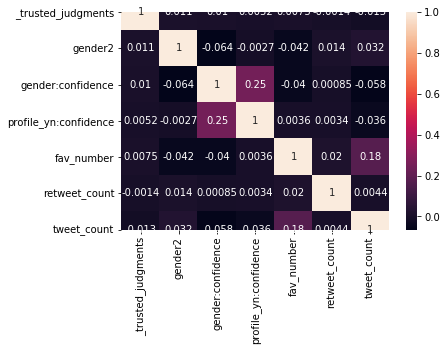

In [10]:
sb.heatmap(df.corr(), annot =True)

<h2 id="data">Common Words</h2>
<p>Lets find the common words used by male and female.</p>
Here we find the most used words by joining all the ['text'] values using the built in function "join" and count the mostly used words and found the answers

<h4>Finding common words used by male</h4>

In [11]:
male.head(2)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,‰ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)


In [12]:
pd.Series(' '.join(male.text).split()).value_counts()

the           4251
and           3685
to            1906
a             1645
I             1570
              ... 
argument."       1
‰Ð¼              1
barna            1
Hologram         1
THATS            1
Length: 27670, dtype: int64

<h4>Finding common words used by female</h4> 

In [13]:
female.head(2)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN
5,815719231,False,finalized,3,10/27/15 1:47,female,1.0,yes,1.0,3/11/10 18:14,...,https://pbs.twimg.com/profile_images/656336865...,0,0,"Ive seen people on the train with lamps, chair...",NaN,20036,10/26/15 12:40,6.587300e+17,New York Gritty,Central Time (US & Canada)


In [14]:
pd.Series(' '.join(female.text).split()).value_counts()

and                        4352
the                        4049
I                          2364
to                         2188
a                          1454
                           ... 
https://t.co/JEdeMM7cLg       1
H19BD                         1
stands                        1
toilets                       1
beed                          1
Length: 26141, dtype: int64

<h3>Therefore the common words used by male and female are "and" , "the" & "to"</h3>

<h2>Average Number Of Words</h2>
<p>Lets find the average number of words used by both gender.</p>
Here we create a dictionary and iterate through the the "text" column and find how many times the each words occured after that sum of the count was found and divide it with column value.


<h4>Finding average number of words used by female</h4>

In [15]:
number_of_words={}
for i in range(female.shape[0]):
    words=str(female['text'].values[i]).split(' ')
    for j in words:
        try:
            count=number_of_words[j]
            number_of_words[j]=count+1
        except:
            number_of_words[j]=1
            
number_of_words

{'Watching': 5,
 'Neighbours': 1,
 'on': 710,
 'Sky+': 1,
 'catching': 4,
 'up': 295,
 'with': 616,
 'the': 4044,
 'Neighbs!!': 1,
 'Xxx': 2,
 '_Ù÷Ä_Ù÷Ä_Ù÷Ä_ÙÔÎ_Ù�È_ÙÔ�_Ù�È': 1,
 'Ive': 6,
 'seen': 30,
 'people': 198,
 'train': 10,
 'lamps,': 1,
 'chairs,': 1,
 'tvs': 1,
 'etc': 5,
 '': 465,
 'https://t.co/w6zf4pVM4I': 1,
 '@_Aphmau_': 1,
 'pic': 6,
 'defines': 1,
 'all': 353,
 'mcd': 2,
 'fangirls/fanboys': 1,
 'and': 4250,
 'shippers': 2,
 'xD': 6,
 '@Evielady': 1,
 'just': 464,
 'how': 167,
 'lovely': 10,
 'is': 977,
 'tree': 3,
 'this': 403,
 'year!': 2,
 'Never': 10,
 'it': 728,
 'as': 156,
 'gorgeous': 7,
 '#Autumn': 2,
 '#colour': 1,
 'Just': 118,
 'put': 58,
 'my': 1065,
 'ass': 37,
 'line': 10,
 'for': 1071,
 'you': 1298,
 'repay': 1,
 'me.': 41,
 'will': 180,
 'i': 328,
 'even': 115,
 'need': 144,
 'sound': 7,
 'effects': 4,
 'diviners': 1,
 'tonight': 26,
 'https://t.co/EROGWTFTYo': 3,
 "It's": 90,
 'a': 1454,
 'glow': 2,
 'of': 1208,
 'satisfaction': 1,
 're': 8,
 'The': 54

In [16]:
total_no_words=sum(number_of_words.values())

In [17]:
female.shape

(6700, 26)

In [18]:
average_number_words_female=total_no_words/female.shape[0]

<h4>Finding average number of words used by male</h4>

In [19]:
number_of_words={}
for i in range(male.shape[0]):
    words=str(male['text'].values[i]).split(' ')
    for j in words:
        try:
            count=number_of_words[j]
            number_of_words[j]=count+1
        except:
            number_of_words[j]=1
            
number_of_words

{'Robbie': 1,
 'E': 2,
 'Responds': 1,
 'To': 37,
 'Critics': 1,
 'After': 12,
 'Win': 3,
 'Against': 3,
 'Eddie': 2,
 'Edwards': 4,
 'In': 66,
 'The': 616,
 '#WorldTitleSeries': 1,
 'https://t.co/NSybBmVjKZ': 1,
 '‰ÛÏIt': 2,
 'felt': 5,
 'like': 319,
 'they': 251,
 'were': 80,
 'my': 536,
 'friends': 31,
 'and': 3651,
 'I': 1550,
 'was': 359,
 'living': 11,
 'the': 4248,
 'story': 22,
 'with': 498,
 'them‰Û�': 1,
 'https://t.co/arngE0YHNO': 1,
 '#retired': 1,
 '#IAN1': 2,
 'https://t.co/CIzCANPQFz': 1,
 'i': 251,
 'absolutely': 7,
 'adore': 2,
 'when': 199,
 'louis': 6,
 'starts': 15,
 'songs': 16,
 'it': 611,
 'hits': 4,
 'me': 418,
 'hard': 21,
 'but': 265,
 'feels': 11,
 'good': 134,
 'Hi': 15,
 '@JordanSpieth': 1,
 '-': 314,
 'Looking': 13,
 'at': 386,
 'url': 3,
 'do': 226,
 'you': 1125,
 'use': 44,
 '@IFTTT?!': 1,
 '': 603,
 "Don't": 31,
 'typically': 1,
 'see': 130,
 'an': 154,
 'advanced': 2,
 'user': 4,
 'on': 758,
 '@PGATOUR!': 1,
 'https://t.co/H68ou5PE9L': 1,
 'Gala': 5,
 

In [20]:
total_no_words=sum(number_of_words.values())

In [21]:
male.shape

(6194, 26)

In [22]:
average_number_words_male=total_no_words/male.shape[0]

<h4>Final answer</h4>

In [23]:
print("The average number of words used by FEMALE in thier tweet is:",average_number_words_female)
print("The average number of words used by MALE in thier tweet is:",average_number_words_male)


The average number of words used by FEMALE in thier tweet is: 15.850298507462687
The average number of words used by MALE in thier tweet is: 16.237003551824348


<h2 id="data"> Ensemble Machine Learning Modelling </h2>

Assign independent and dependent variables. Here gender is the dependent variable. 

In [24]:
#independent variables along X axis
#dependent variable along Y axis
X = df[['_trusted_judgments','gender:confidence',
       'profile_yn:confidence', 'fav_number',
       'retweet_count','tweet_count']].values
Y =df[['gender2']].values

<h3>TESTING AND SPLITTING THE DATASET</h3>
Splitting the dataset into two: train and test dataset

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

<h1>KNN ALGORITHM</h1>
Finding the KNN algorithm accuracy. 

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)


C:\Users\sreel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [27]:
from sklearn import metrics
y_pred = knn.predict(X_test)
print("Test set Accuracy: ",metrics.accuracy_score(Y_test, y_pred))

Test set Accuracy:  0.5353598014888338


<h1>SUPPORT VECTOR MACHINE</h1>
SVM algorithm accuracy.

In [37]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
# training Linear Regression model on training data
svc.fit(X_train, Y_train)# The coefficients


C:\Users\sreel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sreel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [38]:
y_pred = svc.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print ("TEST ACCURACY:",metrics.accuracy_score(Y_test, y_pred))


TEST ACCURACY: 0.5406327543424317


<h1>RANDOM FOREST ALGORITHM</h1>
Finding accuracy of random forest algorithm.

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
# training Linear Regression model on training data
rfc.fit(X_train, Y_train)


C:\Users\sreel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sreel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
y_pred = rfc.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print ("TEST ACCURACY:",metrics.accuracy_score(Y_test, y_pred))

TEST ACCURACY: 0.5483870967741935


<h1>ACCURACY OF THREE ALGORITHM</h1>

<p>From the above, we find each algorithm accuracy.</p>

<P>Accuracy of each algorithm</P>
<P>1.KNN                            :53% </P>
<P>2.SVM                            :54% </P>
<P>3.RANDOM FOREST                  :54% </P>
    
<h4>Comparing the Accuracy of all three, the ML algorithm that suits best for the given problem is RANDOM FOREST ALGORITHM and SUPPORT VECTOR MACHINE.</h4>  